In [43]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

In [53]:
import pandas 
import tensorflow.keras as keras
from tensorflow.keras import backend as K
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
%matplotlib inline

In [54]:
def grab_image(img_path):
    img = image.load_img(img_path, target_size=(299, 299)) 
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Grab training images
X = np.concatenate( 
    [grab_image('Training_images/image%d.tif'%(i))
    for i in range(1,1001)]) 
X.shape

(1000, 299, 299, 3)

In [59]:
# Read in data labels
Y = np.loadtxt('Training_labels.csv')
Y = keras.utils.to_categorical(Y)
Y.shape

(1000, 16)

In [60]:
# Visual confirmations labels have been read in correctly
Y[0:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [61]:
#Build model
model=keras.Sequential()
# Note the input size (there is only one channel - intensity)
# these images... if you are using color images, your would
# need to set the last dimension of the input_shape to -3-
# above and this would carry over into this cell...
model.add(keras.layers.Conv2D(36,kernel_size=(6,6),
                              activation='relu',input_shape=[X.shape[1],
                                                             X.shape[2],
                                                             X.shape[3]]))
model.add(keras.layers.Conv2D(65,(6,6),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(65,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(Y.shape[1],activation='softmax'))

model.compile(loss=keras.losses.CategoricalCrossentropy(),
              optimizer=keras.optimizers.Adam(),
              metrics=[keras.metrics.CategoricalAccuracy()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 294, 294, 36)      3924      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 289, 289, 65)      84305     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 144, 144, 65)      0         
_________________________________________________________________
dropout (Dropout)            (None, 144, 144, 65)      0         
_________________________________________________________________
flatten (Flatten)            (None, 1347840)           0         
_________________________________________________________________
dense (Dense)                (None, 65)                87609665  
_________________________________________________________________
dropout_1 (Dropout)          (None, 65)                0

In [62]:
#Train model
batch_size = 20
epochs = 10
history = model.fit(X, Y,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1)

Epoch 1/10
50/50 [==============================] - 521s 10s/step - loss: 14.4691 - categorical_accuracy: 0.1062
Epoch 2/10
50/50 [==============================] - 595s 12s/step - loss: 2.6710 - categorical_accuracy: 0.1504
Epoch 3/10
50/50 [==============================] - 600s 12s/step - loss: 2.3766 - categorical_accuracy: 0.2795
Epoch 4/10
50/50 [==============================] - 498s 10s/step - loss: 2.0389 - categorical_accuracy: 0.4078
Epoch 5/10
50/50 [==============================] - 608s 12s/step - loss: 1.4666 - categorical_accuracy: 0.5739
Epoch 6/10
50/50 [==============================] - 507s 10s/step - loss: 0.9304 - categorical_accuracy: 0.7477
Epoch 7/10
50/50 [==============================] - 507s 10s/step - loss: 0.6182 - categorical_accuracy: 0.8003
Epoch 8/10
50/50 [==============================] - 511s 10s/step - loss: 0.3582 - categorical_accuracy: 0.8832
Epoch 9/10
50/50 [==============================] - 533s 11s/step - loss: 0.3542 - categorical_accuracy

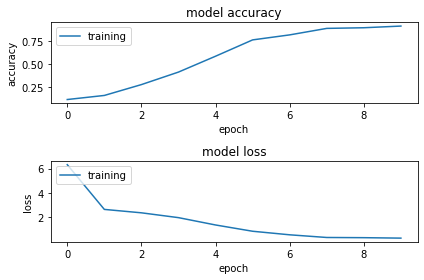

In [64]:
plt.figure()

# summarize history for accuracy  
plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
#plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training'],loc='upper left')
# Add validation later
#plt.legend(['training','validation'],loc='upper left')

# summarize history for loss  
plt.subplot(212)
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training'],loc='upper left')
# Add validation later
#plt.legend(['training','validation'],loc='upper left')
plt.tight_layout()
plt.show()